In [5]:
# Initialization

import math
from datetime import datetime
import openpyxl as opxl
from openpyxl.utils.dataframe import dataframe_to_rows
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import model as ty
import proc as pr
import matplotlib.ticker as mtick
import sklearn.metrics

from IPython.core.display import HTML

import heat_transfer as bht

import fluids as fds
import ht 

import general as gen

import os

import scipy.integrate as integrate
import scipy.optimize as sco

import networkx as nx

import plotly.graph_objects as go

import plot_functions_here as pfun

import pyvista as pv


In [22]:
folder_path = r'G:\Drive partagés\Cercle Hard\Production\R&D - Modèles numériques\PVT-perf-1Dmodel'
geometry_path = folder_path + '\\' + 'Inputs\\Inputs_TEST.xlsx'
hypotheses_path = folder_path + '\\' + 'Hypotheses\\Model_hypotheses.xlsx'
condi_path = folder_path + '\\' + 'Steady-state conditions inputs\\221122_TUV_test_conditions_S425-I_MPP.xlsx'

output_name = 'TEST_n1'

componentSpecs = pr.import_geometry(geometry_path)
hyp = pr.create_dict_from_excel(hypotheses_path,'Main')
steadyStateConditions_df = pr.create_inputs_from_excel(condi_path,componentSpecs,hyp)

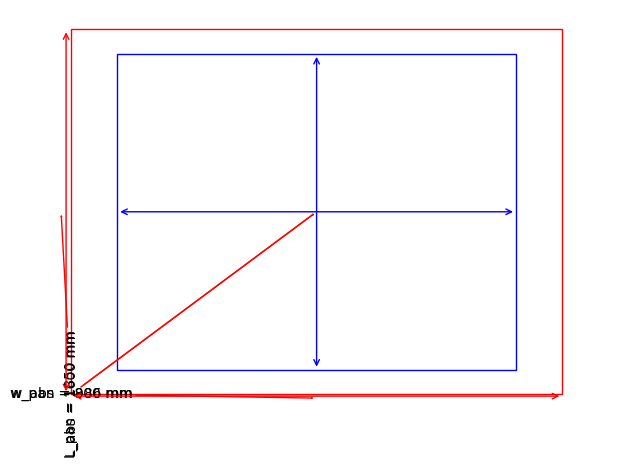

In [36]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from adjustText import adjust_text

# Example dimensions for the rectangles
L_pan = 1850
w_pan = 986
L_abs = 1600
w_abs = 800

fig, ax = plt.subplots()

# Create a rectangle patch for the outer rectangle
outer_rectangle = Rectangle((0, 0), w_pan, L_pan, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(outer_rectangle)

# Create a rectangle patch for the inner rectangle
inner_rectangle = Rectangle(((w_pan - w_abs) / 2, (L_pan - L_abs) / 2), w_abs, L_abs, linewidth=1, edgecolor='b', facecolor='none')
ax.add_patch(inner_rectangle)

texts = []

# Annotate the outer rectangle
texts.append(ax.text(w_pan / 2, -20, f'w_pan = {w_pan} mm', ha='center', va='top'))
texts.append(ax.text(-20, L_pan / 2, f'L_pan = {L_pan} mm', ha='right', va='center', rotation=90))

# Annotate the inner rectangle
texts.append(ax.text(w_pan / 2, L_pan / 2, f'w_abs = {w_abs} mm', ha='center', va='bottom'))
texts.append(ax.text(w_pan / 2, L_pan / 2, f'L_abs = {L_abs} mm', ha='left', va='center', rotation=90))

# Arrows for the outer rectangle
ax.annotate('', xy=(0, -10), xytext=(w_pan, -10), arrowprops=dict(arrowstyle='<->', color='r'))
ax.annotate('', xy=(-10, 0), xytext=(-10, L_pan), arrowprops=dict(arrowstyle='<->', color='r'))

# Arrows for the inner rectangle
ax.annotate('', xy=((w_pan - w_abs) / 2, L_pan / 2), xytext=((w_pan + w_abs) / 2, L_pan / 2),
            arrowprops=dict(arrowstyle='<->', color='b'))
ax.annotate('', xy=(w_pan / 2, (L_pan - L_abs) / 2), xytext=(w_pan / 2, (L_pan + L_abs) / 2),
            arrowprops=dict(arrowstyle='<->', color='b'))

# Adjust text positions
adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='->', color='red'))

# Set the limits to account for annotations
ax.set_xlim(-100, w_pan + 100)
ax.set_ylim(-100, L_pan + 100)

# Turn off the axis
plt.axis('off')
plt.tight_layout()
plt.show()


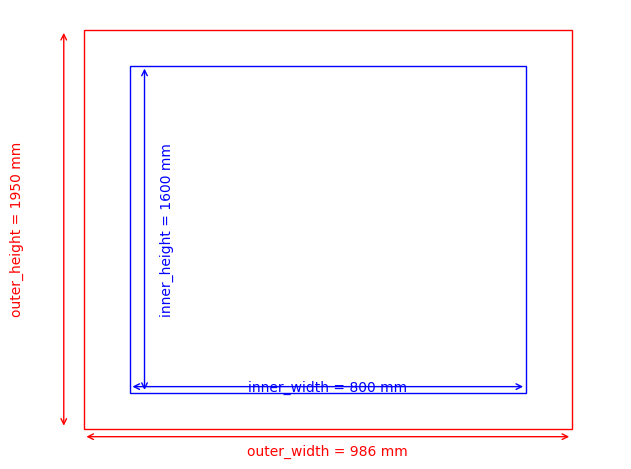

In [34]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Example dimensions for the rectangles
L_pan = 1950
w_pan = 986
L_abs = 1600
w_abs = 800

# Function to draw a rectangle and annotate dimensions
def draw_rectangle(ax, origin, width, height, color, annotation_offset, label_prefix):
    rect = Rectangle(origin, width, height, linewidth=1, edgecolor=color, facecolor='none')
    ax.add_patch(rect)
    # Annotate width
    ax.annotate('', xy=(origin[0], origin[1] - annotation_offset), xytext=(origin[0] + width, origin[1] - annotation_offset),
                arrowprops=dict(arrowstyle='<->', color=color))
    ax.text(origin[0] + width / 2, origin[1] - annotation_offset * 2, f'{label_prefix}_width = {width} mm',
            ha='center', va='top', color=color)
    # Annotate height
    ax.annotate('', xy=(origin[0] - annotation_offset, origin[1]), xytext=(origin[0] - annotation_offset, origin[1] + height),
                arrowprops=dict(arrowstyle='<->', color=color))
    ax.text(origin[0] - annotation_offset * 3, origin[1] + height / 2, f'{label_prefix}_height = {height} mm',
            ha='right', va='center', rotation=90, color=color)

fig, ax = plt.subplots()

# Draw the outer rectangle
draw_rectangle(ax, (0, 0), w_pan, L_pan, 'red', 40, 'outer')
# Draw the inner rectangle
draw_rectangle(ax, ((w_pan - w_abs) / 2, (L_pan - L_abs) / 2), w_abs, L_abs, 'blue', -30, 'inner')

# Set the limits to account for annotations
ax.set_xlim(-100, w_pan + 100)
ax.set_ylim(-100, L_pan + 100)

# Turn off the axis
plt.axis('off')
plt.tight_layout()
plt.show()


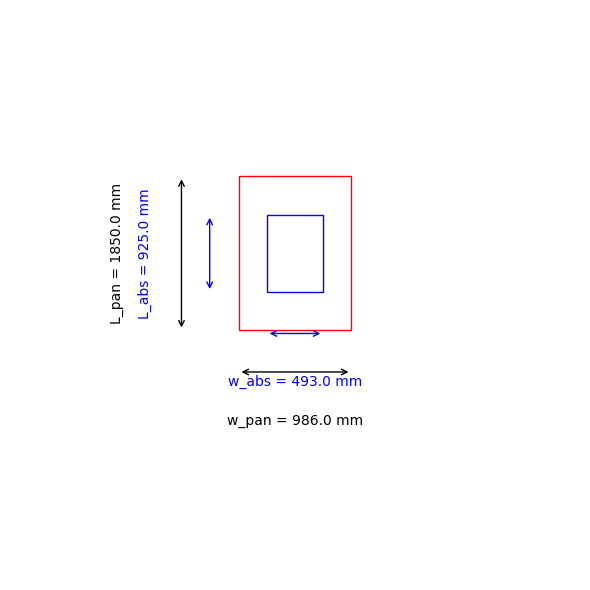

In [31]:
# Outer rectangle dimensions in millimeters (L_pan is now the vertical dimension)
L_pan = componentSpecs['pv']['L_pan'] * 18500
w_pan = componentSpecs['pv']['w_pan'] * 9860

# Inner rectangle dimensions in millimeters (placeholder values)
L_abs = componentSpecs['pv']['L_pan'] * 9250  # Example conversion, adjust as necessary
w_abs = componentSpecs['pv']['w_pan'] * 4930  # Example conversion, adjust as necessary

fig, ax = plt.subplots(figsize=(6, 6))  # Adjust figsize to control the aspect ratio

# Create an outer rectangle patch
outer_rectangle = Rectangle((0, 0), w_pan, L_pan, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(outer_rectangle)

# Create an inner rectangle patch, position it in the center
inner_rectangle = Rectangle(((w_pan - w_abs) / 2, (L_pan - L_abs) / 2), w_abs, L_abs, linewidth=1, edgecolor='blue', facecolor='none')
ax.add_patch(inner_rectangle)

# Set limits for x and y axes with added margins
margin = 2000  # Increase margin if needed
ax.set_xlim(-margin, w_pan + margin)
ax.set_ylim(-1.5 * margin, L_pan + margin)  # Increase bottom margin for L_pan label

# Draw arrows and labels for outer rectangle dimensions
# w_pan label (horizontal dimension)
ax.annotate('', xy=(0, -margin / 4), xytext=(w_pan, -margin / 4), arrowprops=dict(arrowstyle='<->'))
ax.text(w_pan / 2, -margin / 2, f'w_pan = {w_pan} mm', ha='center', va='top')

# L_pan label (vertical dimension)
ax.annotate('', xy=(-margin / 4, 0), xytext=(-margin / 4, L_pan), arrowprops=dict(arrowstyle='<->'))
ax.text(-margin / 2, L_pan / 2, f'L_pan = {L_pan} mm', ha='right', va='center', rotation=90)

# Draw arrows and labels for inner rectangle dimensions
# w_abs label (horizontal dimension of inner rectangle)
ax.annotate('', xy=((w_pan - w_abs) / 2, (L_pan - L_abs) / 2 - margin / 4), 
            xytext=((w_pan + w_abs) / 2, (L_pan - L_abs) / 2 - margin / 4), 
            arrowprops=dict(arrowstyle='<->', color='blue'))
ax.text(w_pan / 2, (L_pan - L_abs) / 2 - margin / 2, f'w_abs = {w_abs} mm', ha='center', va='top', color='blue')

# L_abs label (vertical dimension of inner rectangle)
ax.annotate('', xy=((w_pan - w_abs) / 2 - margin / 4, (L_pan - L_abs) / 2), 
            xytext=((w_pan - w_abs) / 2 - margin / 4, (L_pan + L_abs) / 2), 
            arrowprops=dict(arrowstyle='<->', color='blue'))
ax.text((w_pan - w_abs) / 2 - margin / 2, L_pan / 2, f'L_abs = {L_abs} mm', ha='right', va='center', rotation=90, color='blue')

plt.axis('off')  # Turn off axis
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

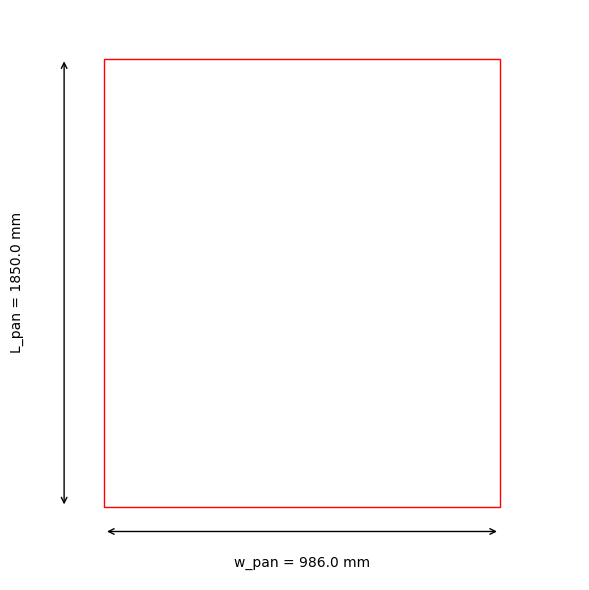

In [29]:
# Rectangle dimensions in millimeters (L_pan is now the vertical dimension)
L_pan = componentSpecs['pv']['L_pan'] * 18500
w_pan = componentSpecs['pv']['w_pan'] * 9860
L_abs = 1600
w_abs = 750

fig, ax = plt.subplots(figsize=(6, 6))  # Adjust figsize to control the aspect ratio
# Create a rectangle patch with swapped dimensions for correct orientation
rectangle = Rectangle((0, 0), w_pan, L_pan, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rectangle)

# Set limits for x and y axes with added margins
margin = 200  # Increase margin if needed
ax.set_xlim(-margin, w_pan + margin)
ax.set_ylim(-1.5 * margin, L_pan + margin)  # Increase bottom margin for L_pan label

# Draw arrows and labels for dimensions
# w_pan label (horizontal dimension)
ax.annotate('', xy=(0, -margin / 2), xytext=(w_pan, -margin / 2), arrowprops=dict(arrowstyle='<->'))
ax.text(w_pan / 2, -margin, f'w_pan = {w_pan} mm', ha='center', va='top')

# L_pan label (vertical dimension)
ax.annotate('', xy=(-margin / 2, 0), xytext=(-margin / 2, L_pan), arrowprops=dict(arrowstyle='<->'))
ax.text(-margin, L_pan / 2, f'L_pan = {L_pan} mm', ha='right', va='center', rotation=90)

plt.axis('off')  # Turn off axis
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

In [6]:
# Define a 2D polygon as your shape
points = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0]])
poly = pv.PolyData(points)
poly.lines = np.array([4, 0, 1, 2, 3])  # Define the line connectivity

# Extrude the polygon into 3D
extruded = poly.extrude([0, 0, 1])  # Extrude in the z-direction

c:\Users\valen\Documents_local\model23\lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
c:\Users\valen\Documents_local\model23\lib\site-packages\pyvista\core\filters\poly_data.py:2933: PyVistaFutureWarning: The default value of the ``capping`` keyword argument will change in a future version to ``True`` to match the behavior of VTK. We recommend passing the keyword explicitly to prevent future surprises.
  warnings.warn(


In [7]:
# Create a temperature field
temperature = np.linspace(0, 100, extruded.n_points)  # Example temperature data

# Add the temperature field to the extruded shape
extruded['Temperature'] = temperature

In [ ]:
plotter = pv.Plotter()
plotter.add_mesh(extruded, scalars='Temperature', cmap='hot')
plotter.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_diagram(W, Htube, Dtube, L, w_tube, l_plate, upper_gap, abs_gap, insulation_thickness):
    fig, ax = plt.subplots()

    # Draw the main rectangle (the outer box)
    main_rectangle = patches.Rectangle((0, 0), W, Htube, linewidth=1, edgecolor='black', facecolor='none')
    ax.add_patch(main_rectangle)

    # Draw the tube
    tube = patches.Rectangle((W/2 - w_tube/2, upper_gap + abs_gap), w_tube, Dtube, linewidth=1, edgecolor='black', facecolor='none')
    ax.add_patch(tube)
    
    # Draw the riser plate
    riser_plate = patches.Rectangle((W/2 - w_tube/2, upper_gap + abs_gap + Dtube), w_tube, l_plate, linewidth=1, edgecolor='black', facecolor='none')
    ax.add_patch(riser_plate)
    
    # Add insulation below
    insulation = patches.Rectangle((0, Htube - insulation_thickness), W, insulation_thickness, linewidth=1, edgecolor='black', facecolor='none')
    ax.add_patch(insulation)

    # Set the limits of the plot
    ax.set_xlim(-10, W + 10)
    ax.set_ylim(-10, Htube + 10)

    # Set equal scaling
    ax.set_aspect('equal')

    # Remove the axes
    ax.axis('off')

    # Add dimension lines (using arrows)
    ax.annotate("", xy=(0, Htube + 5), xytext=(W, Htube + 5), arrowprops=dict(arrowstyle='<->'))
    ax.text(W/2, Htube + 6, f"W={W}", ha='center')

    ax.annotate("", xy=(-5, 0), xytext=(-5, Htube), arrowprops=dict(arrowstyle='<->'))
    ax.text(-6, Htube/2, f"Htube={Htube}", va='center', rotation='vertical')

    ax.annotate("", xy=(W/2 + w_tube/2 + 1, upper_gap + abs_gap), xytext=(W/2 + w_tube/2 + 1, upper_gap + abs_gap + Dtube), arrowprops=dict(arrowstyle='<->'))
    ax.text(W/2 + w_tube/2 + 2, upper_gap + abs_gap + Dtube/2, f"Dtube={Dtube}", va='center', rotation='vertical')

    # Save the figure
    plt.show()


draw_diagram(W=300, Htube=100, Dtube=30, L=150, w_tube=50, l_plate=20, upper_gap=10, abs_gap=5, insulation_thickness=10)
